In [1]:
from linares_plot import *
import statsmodels.formula.api as smf

In [5]:
df= pd.read_excel('C:\\Users\\David\\Desktop\\IDIBAPS\\simulations_radial\\results_simul_radial_linear_all.xlsx')

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


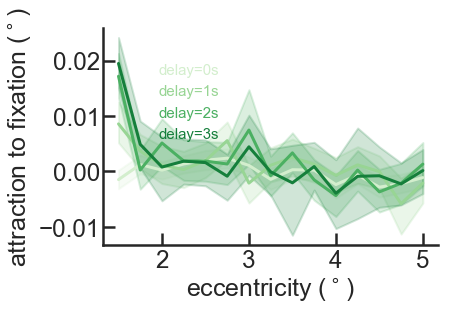

In [4]:
pal_ = sns.color_palette("Greens", n_colors=4)

sns.lineplot(x="position", y="interference", hue='delay_time', hue_order=[0, 1000, 2000, 3000],
             ci=95, palette=pal_, data=df)

plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              
plt.gca().spines['top'].set_visible(False)                                                                                  
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.ylabel(r'attraction to fixation ($^\circ$)', fontsize=25);
plt.xlabel(r'eccentricity ($^\circ$)', fontsize=25);
#plt.ylim(-2,12);
#plt.yticks([0,4,8,12]);
#plt.plot([60, 300], [0,0], 'k--', linewidth=1)

l =plt.legend(loc=2, frameon=False, prop={'size': 15}, ncol=1)

hue_order=['', 'delay=0s', 'delay=1s', 'delay=2s', 'delay=3s']
palette=['black', pal_[0], pal_[1], pal_[2], pal_[3]]

for i_h, h_idx in enumerate(hue_order):
    l.get_texts()[i_h].set_text(h_idx)
    l.legendHandles[i_h].set_visible(False);
    l.get_texts()[i_h].set_color(palette[i_h]);

In [ ]:
frames=[]

for idx, TIMES in enumerate(list(np.arange(0,4000, 1000) + 450 ) ): ##4000
	print(TIMES)
	Positions = [1.5, 5.5]
	Times=[TIMES for i in range(len(Positions))]
	outputs= Parallel(n_jobs = numcores)(delayed(model_radial_linear)(totalTime=tim, 
	           targ_onset=100,  
	           presentation_period=350,
	           position=posx, 
	           tauE=9, tauI=4,  
	           I0E=0.1, I0I=0.5,
	           GEE=0.022, GEI=0.019, GIE=0.01 , GII=0.1, 
	           NsigE=0.8, NsigI=1.7, 
	           N=512, rint = 1, rext = 6,
	           plot_connectivity=False, 
	           plot_rate=False, save_RE=False) for posx, tim in zip(Positions, Times)) 
	#
	df = pd.DataFrame(outputs)
	df.columns=['interference', 'position']
	df['delay_time']=TIMES-450
	frames.append(df)
	############

##
df_tot = pd.concat(frames)

In [23]:
from model_radial_linear import *
%load_ext autoreload
%autoreload 2

numcores = multiprocessing.cpu_count() - 3

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
A = model_radial_linear(totalTime=3450, 
	           targ_onset=100,  
	           presentation_period=350,
	           position=5., 
	           tauE=9, tauI=4,  
	           I0E=0.1, I0I=0.5,
	           GEE=0.022, GEI=0.019, GIE=0.01 , GII=0.1, 
	           NsigE=0.8, NsigI=1.7, 
	           N=512, rint = 1, rext = 6,
	           plot_connectivity=False, 
	           plot_rate=False, save_RE=True)

0.12 5.0 3450


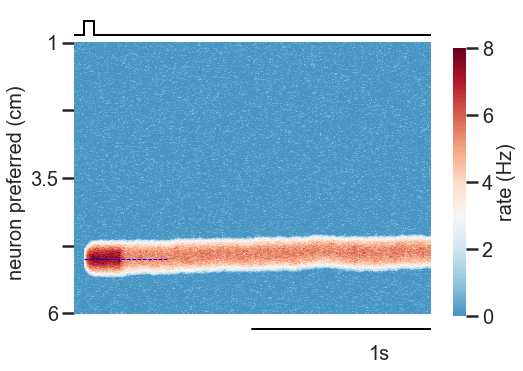

In [28]:
print(A[0], A[1], A[2])
simulation_heatmap_rad(A[3], time_simulation=2000, position=5,  target_onset=100, pres_period=100)

In [29]:

frames=[]

for idx, TIMES in enumerate([3450]): # enumerate(list(np.arange(0,4000, 1000) + 450 ) ): ##4000
	print(TIMES)
	Positions = [5]*8 ##list(np.arange(1.5,5.25,0.25))*500 ##0.25
	Times=[TIMES for i in range(len(Positions))]
	outputs= Parallel(n_jobs = numcores)(delayed(model_radial_linear)(totalTime=tim, 
	           targ_onset=100,  
	           presentation_period=350,
	           position=posx, 
	           tauE=9, tauI=4,  
	           I0E=0.1, I0I=0.5,
	           GEE=0.022, GEI=0.019, GIE=0.01 , GII=0.1, 
	           NsigE=0.8, NsigI=1.7, 
	           N=512, rint = 1, rext = 6,
	           plot_connectivity=False, 
	           plot_rate=False, save_RE=False) for posx, tim in zip(Positions, Times)) 
	#
	df = pd.DataFrame(outputs)
	df.columns=['interference', 'position', 'simul_time']
	df['delay_time']=TIMES-450
	frames.append(df)
	############

##
df_tot = pd.concat(frames)

3450


In [30]:
df_tot

,interference,position,simul_time,delay_time
0,0.215,5,3450,3000
1,0.237,5,3450,3000
2,0.200,5,3450,3000
3,0.173,5,3450,3000
4,0.122,5,3450,3000
5,0.199,5,3450,3000
6,0.200,5,3450,3000
7,0.133,5,3450,3000


In [31]:
from model_radial_linear2 import *
%load_ext autoreload
%autoreload 2

numcores = multiprocessing.cpu_count() - 3

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [32]:

frames=[]

for idx, TIMES in enumerate([3450]): # enumerate(list(np.arange(0,4000, 1000) + 450 ) ): ##4000
	print(TIMES)
	Positions = [5]*8 ##list(np.arange(1.5,5.25,0.25))*500 ##0.25
	Times=[TIMES for i in range(len(Positions))]
	outputs= Parallel(n_jobs = numcores)(delayed(model_radial_linear2)(totalTime=tim, 
	           targ_onset=100,  
	           presentation_period=350,
	           position=posx, 
	           tauE=9, tauI=4,  
	           I0E=0.1, I0I=0.5,
	           GEE=0.022, GEI=0.019, GIE=0.01 , GII=0.1, 
	           NsigE=0.8, NsigI=1.7, 
	           N=512, rint = 1, rext = 6,
	           plot_connectivity=False, 
	           plot_rate=False, save_RE=False) for posx, tim in zip(Positions, Times)) 
	#
	df = pd.DataFrame(outputs)
	df.columns=['interference', 'position', 'simul_time']
	df['delay_time']=TIMES-450
	frames.append(df)
	############

##
df_tot = pd.concat(frames)
df_tot

3450


,interference,position,simul_time,delay_time
0,0.271,5,3450,3000
1,0.252,5,3450,3000
2,0.248,5,3450,3000
3,0.244,5,3450,3000
4,0.188,5,3450,3000
5,0.154,5,3450,3000
6,0.142,5,3450,3000
7,0.160,5,3450,3000


In [37]:
relast =pd.read_excel('C:\\Users\\David\\Desktop\\IDIBAPS\\simulations_radial\\relast.xlsx')
relast = relast[0].values
decode_rE(relast) 

288.65779754826616

In [40]:
rext=6
rint=1
position=5
final_readout = decode_rE(relast)
final_radius = final_readout * (float((rext-rint)) / 360) + rint ##conversion a espacio (rint, rext)
error =  position - final_radius
error = round(error, 3)
error

-0.009

In [41]:
RE = pd.read_excel('C:\\Users\\David\\Desktop\\IDIBAPS\\simulations_radial\\RE.xlsx')


In [43]:
RE = RE.values

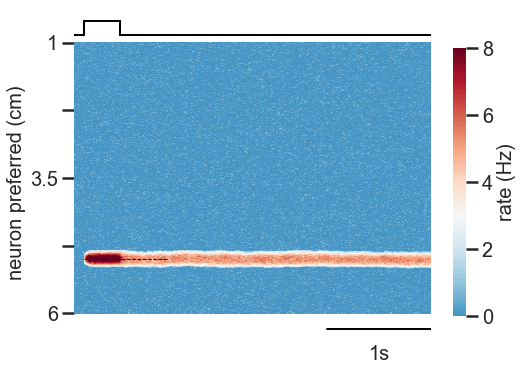

In [44]:
simulation_heatmap_rad(RE, time_simulation=3450, position=5,  target_onset=100, pres_period=350)

In [44]:
angles = [[20, 120, 300, 16, 160, 274], [20, 80, 300, 315, 270, 290]]
d = pd.DataFrame(angles)
d.columns=['T', 'NT1', 'NT2', 'Dist', 'Dist_NT1', 'Dist_NT2']
d

,T,NT1,NT2,Dist,Dist_NT1,Dist_NT2
0,20,120,300,16,160,274
1,20,80,300,315,270,290


In [45]:
def err_deg(a1,ref):
    ### Calculate the error ref-a1 in an efficient way in the circular space
    ### it uses complex numbers!
    ### Input in degrees (0-360)
    a1=np.radians(a1)
    ref=np.radians(ref)
    err = np.angle(np.exp(1j*ref)/np.exp(1j*(a1) ), deg=True) 
    err=round(err, 2)
    return err

In [46]:
close_one=[]

for i in range(len(d)):
    err1 = abs(err_deg(d['T'].iloc[i], d['Dist'].iloc[i]))
    err2 =abs(err_deg(d['NT1'].iloc[i], d['Dist_NT1'].iloc[i]))
    err3 =abs(err_deg(d['NT2'].iloc[i], d['Dist_NT2'].iloc[i]))

    options = ['T', 'NT1', 'NT2']
    erros_dist = [err1, err2, err3]
    pos_min_err = np.where(erros_dist==min(erros_dist))[0][0]
    close_one.append( d[options[pos_min_err]].iloc[i] )

In [47]:
close_one

[20, 300]

In [45]:
from model_radial_linear import *


A = model_radial_linear(totalTime=3450, 
	           targ_onset=100,  
	           presentation_period=350,
	           position=5, 
	           tauE=9, tauI=4,  
	           I0E=0.1, I0I=0.5,
	           GEE=0.022, GEI=0.019, GIE=0.01 , GII=0.1, 
	           NsigE=0.8, NsigI=1.7, 
	           N=512, rint = 1, rext = 6,
	           plot_connectivity=False, 
	           plot_rate=False, save_RE=True) 